In [11]:
import sounddevice as sd
from scipy.io.wavfile import write

def record_audio(duration=5, sr=44100, channels=2, filename="output.wav"):
    print(f"Audioning davomiligi {duration} secund...")
    recording = sd.rec(int(duration * sr), samplerate=sr, channels=channels, dtype="float32")
    sd.wait()
    write(filename, sr, recording)
    print(f"Audio muvofaqatli saqlandi and saqlangan joyi {filename}")

record_audio(duration=5, filename="audio.wav")


Recording audio for 5 seconds...
Audio recorded successfully and saved as recorded_audio.wav


In [16]:
import pyaudio
import wave

def record_audio(duration=5, filename="audio.wav"):
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 44100
    
    audio = pyaudio.PyAudio()
    
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)
    
    print("Yozib olish boshlandi...")
    frames = []
    
    for i in range(0, int(RATE / CHUNK * duration)):
        data = stream.read(CHUNK)
        frames.append(data)
        
    print("Yozib olish tugatildi.")
    
    stream.stop_stream()
    stream.close()
    audio.terminate()
    
    wf = wave.open(filename, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
    print(f"Audio muvofaqatli saqlandi and saqlangan joyi {filename}")

record_audio(duration=5, filename="recorded_audio.wav")


Yozib olish boshlandi...
Yozib olish tugatildi.
Audio muvofaqatli saqlandi and saqlangan joyi recorded_audio.wav


In [5]:
import librosa
import numpy as np

# Audio faylni yuklab olish
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Audio signalni freymlash
S = np.abs(librosa.stft(y))

# Freymlar ro'yxatini olish
print("Shakli:", S.shape)


Shape of the spectrogram: (1025, 216)


Segment 1: Davomiligi = 2.995374149659864 sekund
Segment 2: Davomiligi = 1.2770975056689342 sekund
Segment 3: Davomiligi = 0.5108390022675737 sekund


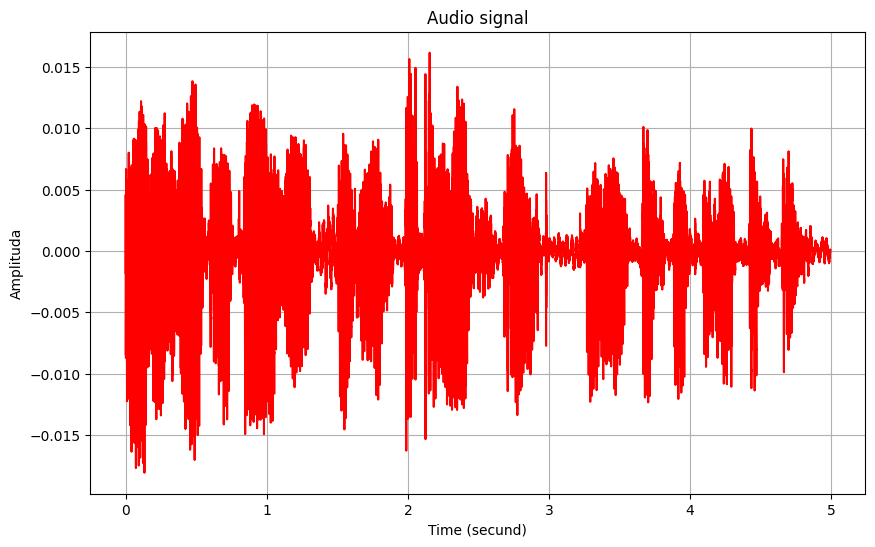

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


def segment_audio(audio_file, top_db=20):
    # Audio faylni yuklab olish
    y, sr = librosa.load(audio_file)

    # Ovozning shoqindan tozalash miqdori (decibels)
    noisiness = librosa.effects.split(y, top_db=top_db)

    # Segmentlarni ajratib olish
    segments = []
    for interval in noisiness:
        start, end = interval
        segment = y[start:end]
        segments.append(segment)

    return segments


# Audio faylni segmentlarga bo'lib ajratish
audio_file = "recorded_audio.wav"
segments = segment_audio(audio_file)

# Segmentlarning uzunligini hisoblash
for i, segment in enumerate(segments):
    duration = len(segment) / sr  # Audio segment uzunligini sekundda hisoblash
    print(f"Segment {i+1}: Davomiligi = {duration} sekund")

# Audio signalning uzunligi
audio_length = len(y)

# Vaqtni o'z ichiga olgan massiv
time = np.arange(0, audio_length) / sr

# Ovozning amplitudasi va vaqtni grafikda chiqarish
plt.figure(figsize=(10, 6))
plt.plot(time, y, color="red")
plt.title("Audio signal")
plt.xlabel("Time (secund)")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

In [15]:
import librosa
import numpy as np

def calculate_energy(spectrogram):
    # Spektrogramning karralari
    magnitudes = np.abs(spectrogram)
    
    # Energia hisoblanishi
    energy = np.sum(magnitudes**2)
    
    return energy

# Audio faylni yuklab olish
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Spektrogramning olinishi
S = np.abs(librosa.stft(y))

# Spektrogramning energiya hajmini hisoblash
energy = calculate_energy(S)
print("Signalning energiya hajmi:", energy)


Signalning energiya hajmi: 1621.8066


Signalning energiya hajmi: 1.0518895
Signalning energiya hajmi: 1621.8066


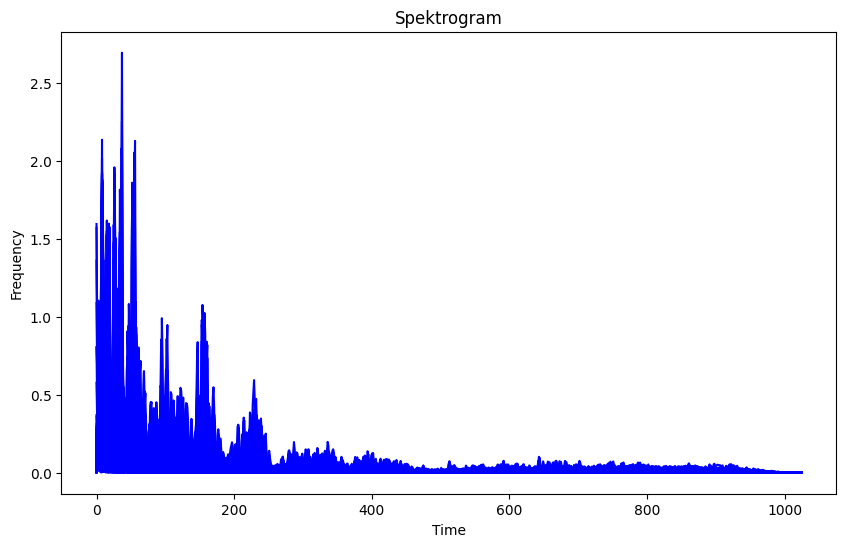

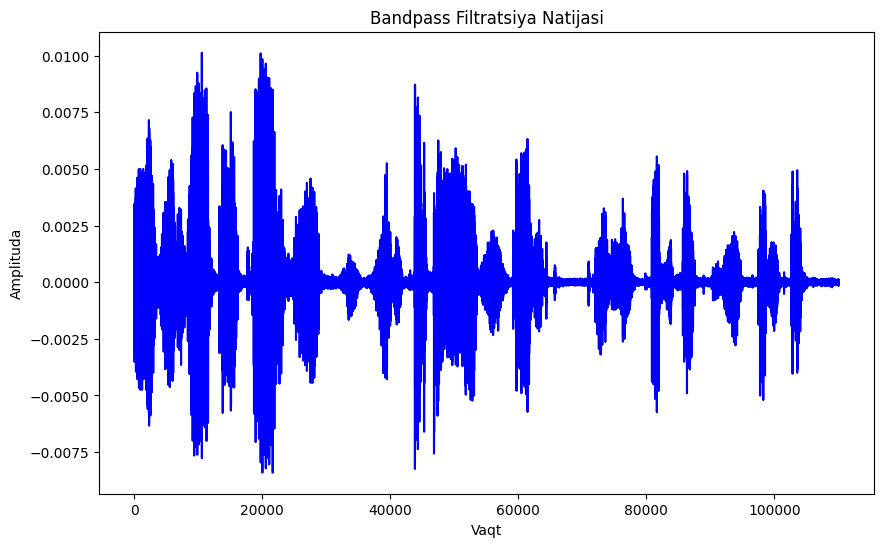

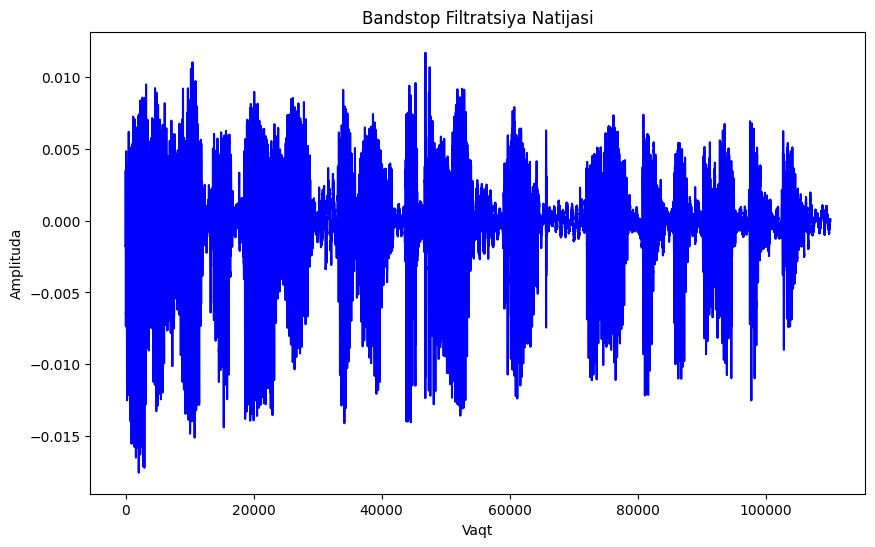

In [20]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

#  Audio faylni yuklash
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Audio faylni ovoz signaliga aylantirish
S = np.abs(librosa.stft(y))

# Spektrogramning energiya hajmini hisoblash
def calculate_energy(spectrogram):
    magnitudes = np.abs(spectrogram)
    energy = np.sum(magnitudes ** 2)
    return energy

# Filtrlashning energiya hajmini o'lchash
energy = calculate_energy(S)
print("Signalning energiya hajmi:", energy)

# Grafikni chiqarish
plt.figure(figsize=(10, 6))
plt.plot(S, color='blue')
plt.title('Spektrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()
import scipy.signal as signal

# Bandpass filtratsiyasi
# Bandpass filtri uchun qo'llanadigan parametrlar
lowcut = 1000  # pastlik chegarasi
highcut = 4000  # yuqori chegarasi
fs = sr  # nuzum darajasi

# Bandpass filtri tanlash
order = 5
b, a = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)

# Filtratsiyani amalga oshirish
filtered_signal = signal.filtfilt(b, a, y)

# Grafikni chiqarish
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal, color='blue')
plt.title('Bandpass Filtratsiya Natijasi')
plt.xlabel('Vaqt')
plt.ylabel('Amplituda')
plt.show()


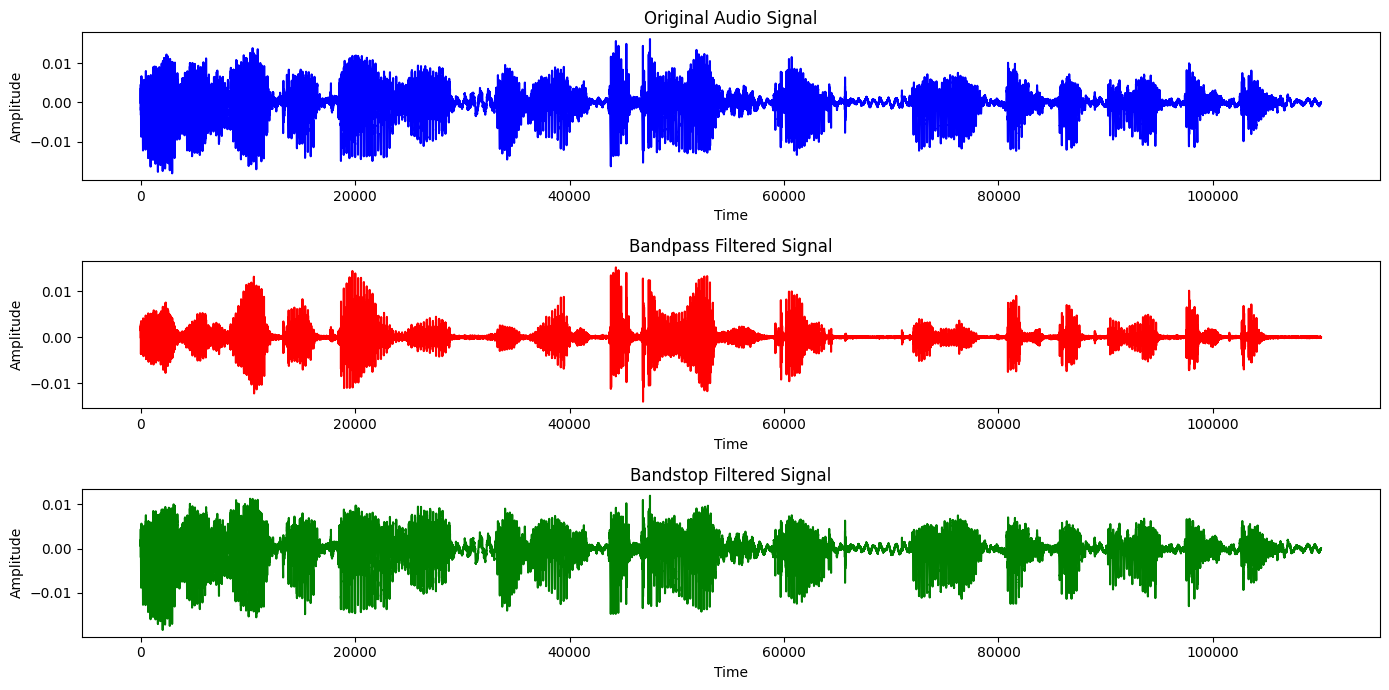

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Audio faylni yuklash 
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Bandpass filtratsiyasi
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Bandstop filtratsiyasi
def butter_bandstop(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

def butter_bandstop_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandstop(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Bandpass filtratsiyasini sinab ko'rish
lowcut_bp = 500  
highcut_bp = 4000  
filtered_signal_bp = butter_bandpass_filter(y, lowcut_bp, highcut_bp, sr)

# Bandstop filtratsiyasini sinab ko'rish
lowcut_bs = 1000 
highcut_bs = 2000  
filtered_signal_bs = butter_bandstop_filter(y, lowcut_bs, highcut_bs, sr)

plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(y, color='blue')
plt.title('Original Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(filtered_signal_bp, color='red')
plt.title('Bandpass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(filtered_signal_bs, color='green')
plt.title('Bandstop Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
